In [20]:
import openml
import pandas as pd
import numpy as np
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
import warnings
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_percentage_error, roc_curve, roc_auc_score


In [2]:
dataset = openml.datasets.get_dataset(150)

X, y, categorical_indicator, attribute_names = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')


categorical_columns = [i for i, indicator in enumerate(categorical_indicator) if indicator]

In [4]:
le = LabelEncoder()
y = le.fit_transform(y)
label_encoder = LabelEncoder()
for col in categorical_columns:
    X.iloc[:, col] = label_encoder.fit_transform(X.iloc[:, col])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
time_cost = []
memory_cost = []

In [26]:
lgbm_model = lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)

start_time = time.time()

lgbm_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

time_cost.append(elapsed_time)
memory_cost.append(memory_usage)

lgbm_accuracy = lgbm_model.score(X_test, y_test)
print("Accuracy:", lgbm_accuracy)

Elapsed Time: 8.525601148605347
Memory Usage: 530.36328125 MB
Accuracy: 0.8287737838093681


In [29]:
catboost_model = cb.CatBoostClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42,verbose=False)

start_time = time.time()

catboost_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

time_cost.append(elapsed_time)
memory_cost.append(memory_usage)

catboost_accuracy = catboost_model.score(X_test, y_test)
print("CatBoost Accuracy:", catboost_accuracy)


Elapsed Time: 19.5908842086792
Memory Usage: 463.1953125 MB
CatBoost Accuracy: 0.7696445014328374


In [30]:
xgboost_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)

start_time = time.time()

xgboost_model.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

time_cost.append(elapsed_time)
memory_cost.append(memory_usage)

xgboost_accuracy = xgboost_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgboost_accuracy)

Elapsed Time: 183.84770441055298
Memory Usage: 449.21875 MB
XGBoost Accuracy: 0.8104696092183507


In [36]:
print(time_cost)

print(memory_cost)

[8.525601148605347, 19.5908842086792, 183.84770441055298]
[530.36328125, 463.1953125, 449.21875]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     42557
           1       0.83      0.87      0.85     56500
           2       0.83      0.88      0.86      7121
           3       0.84      0.79      0.82       526
           4       0.87      0.45      0.59      1995
           5       0.77      0.64      0.70      3489
           6       0.91      0.85      0.88      4015

    accuracy                           0.83    116203
   macro avg       0.84      0.75      0.79    116203
weighted avg       0.83      0.83      0.83    116203



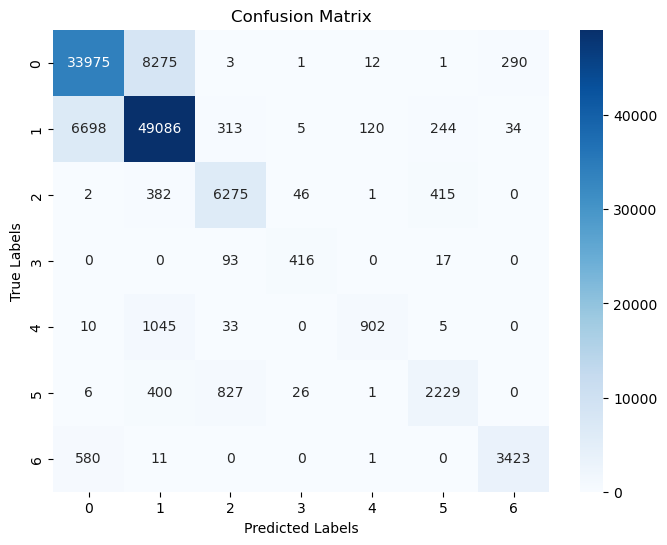

In [10]:
y_pred_lgbm = lgbm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

class_labels = np.unique(np.concatenate((y_test, y_pred_lgbm)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     42557
           1       0.78      0.84      0.81     56500
           2       0.69      0.87      0.77      7121
           3       0.86      0.42      0.57       526
           4       0.87      0.13      0.22      1995
           5       0.59      0.23      0.33      3489
           6       0.88      0.66      0.75      4015

    accuracy                           0.77    116203
   macro avg       0.78      0.56      0.60    116203
weighted avg       0.77      0.77      0.76    116203



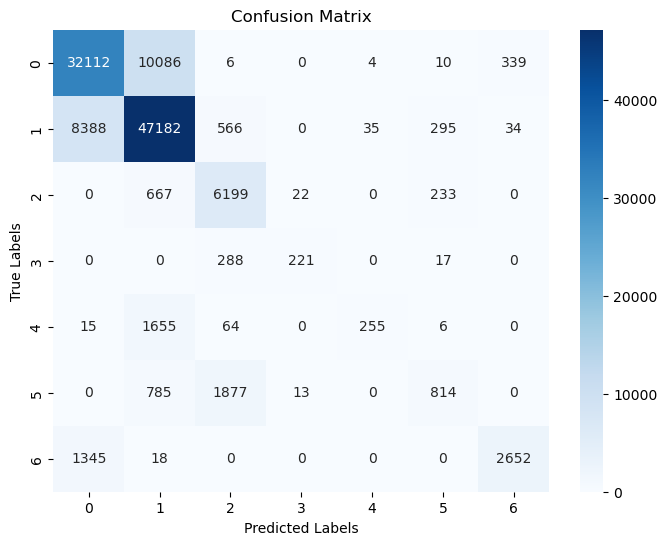

In [9]:
y_pred_cat = catboost_model.predict(X_test)

y_pred_cat = y_pred_cat.flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred_cat))

class_labels = np.unique(np.concatenate((y_test, y_pred_cat)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     42557
           1       0.81      0.86      0.84     56500
           2       0.80      0.87      0.83      7121
           3       0.87      0.82      0.84       526
           4       0.86      0.29      0.43      1995
           5       0.74      0.50      0.60      3489
           6       0.89      0.80      0.84      4015

    accuracy                           0.81    116203
   macro avg       0.82      0.70      0.74    116203
weighted avg       0.81      0.81      0.81    116203



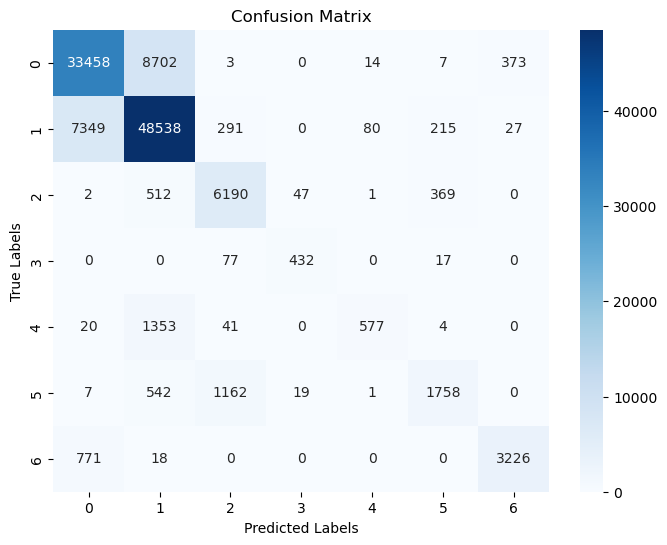

In [11]:
y_pred_xgb = xgboost_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

class_labels = np.unique(np.concatenate((y_test, y_pred_xgb)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [24]:
logreg = LogisticRegression()

warnings.filterwarnings("ignore")

start_time = time.time()

logreg.fit(X_train, y_train)

elapsed_time = time.time() - start_time
print("Elapsed Time:", elapsed_time)

memory_usage = psutil.Process().memory_info().rss / 1024**2  # in megabytes
print("Memory Usage:", memory_usage, "MB")

logreg_accuracy = logreg.score(X_test, y_test)
print("logreg Accuracy:", logreg_accuracy)

Elapsed Time: 41.09574913978577
Memory Usage: 979.17578125 MB
logreg Accuracy: 0.7190692150805057


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71     42557
           1       0.74      0.80      0.77     56500
           2       0.65      0.79      0.71      7121
           3       0.42      0.30      0.35       526
           4       0.22      0.01      0.02      1995
           5       0.44      0.22      0.29      3489
           6       0.72      0.55      0.62      4015

    accuracy                           0.72    116203
   macro avg       0.56      0.48      0.50    116203
weighted avg       0.71      0.72      0.71    116203



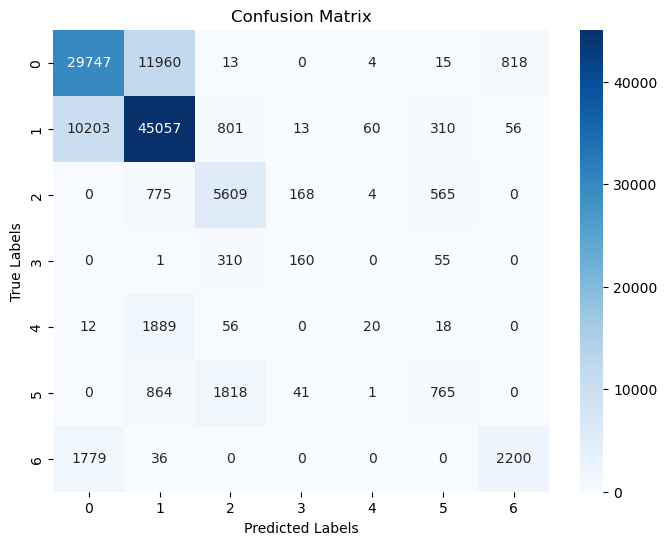

In [23]:
log_pred = logreg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, log_pred))

class_labels = np.unique(np.concatenate((y_test, log_pred)))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()